# Synaptic Connectivity

**Contents**

- [Build-in regular connections](#Build-in-regular-connections)
- [Build-in random connections](#Build-in-random-connections)
- [Customize your connections](#Customize-your-connections)

BrainPy provides several commonly used connection methods in ``brainpy.connect`` module (see the follows).
They are all inherited from the base class `brainpy.connect.Connector`. Users can also customize their synaptic connectivity by the class inheritance.

There are two classes inherited from the base class `brainpy.connect.Connector`:
- [`brainpy.simulation.connect.TwoEndConnector`](https://brainpy.readthedocs.io/en/v2.0.0/apis/auto/simulation/generated/brainpy.simulation.connect.TwoEndConnector.html)
- [`brainpy.simulation.connect.OneEndConnector`](https://brainpy.readthedocs.io/en/v2.0.0/apis/auto/simulation/generated/brainpy.simulation.connect.OneEndConnector.html)

Class `brainpy.simulation.connect.TwoEndConnector` is used as a synaptical connector to build synapse connections between **two neuron groups**.

Class `brainpy.simulation.connect.OneEndConnector` is used as a synaptical connector to build synapse connections within **a population of neurons**.

If users want to learn more about these two classes, please click the link of each class above to check the API documentation.

In [1]:
import brainpy as bp

import numpy as np
import matplotlib.pyplot as plt

## Build-in regular connections

### brainpy.connect.One2One

The neurons in the pre-synaptic neuron group only connect to the neurons
in the same position of the post-synaptic group. Thus, this connection
requires the indices of two neuron groups same. Otherwise, an error will
occurs.

<img src="../_static/one2one.png" width="200 px">

In [2]:
conn = bp.connect.One2One()
conn(pre_size=size, post_size=size)

where `pre_size` denotes the size of the pre-synaptic neuron group, `post_size` denotes the size of the post-synaptic neuron group.
Note that parameter `size` can be *int*, *tuple of int* or *list of int* where each element represent each dimension of neuron group.

In One2One connection, particularly, `pre_size` and `post_size` must be the same.

Class `One2One` is inherited from `TwoEndConnector`. Users can use method `require` or `requires` to get specific connection types.

Here is an example:

In [6]:
size = 5
conn = bp.connect.One2One()(pre_size=size, post_size=size)
res = conn.require('pre_ids', 'post_ids', 'pre2post', 'conn_mat')

print('pre_ids', res[0])
print('post_ids', res[1])
print('pre2post', res[2])
print('conn_mat', res[3])

/Users/ztqakita/opt/miniconda3/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:3610: UserWarning: Explicitly requested dtype <class 'numpy.uint64'> requested in asarray is not available, and will be truncated to dtype uint32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "asarray")


pre_ids JaxArray(DeviceArray([0, 1, 2, 3, 4], dtype=uint32))
post_ids JaxArray(DeviceArray([0, 1, 2, 3, 4], dtype=uint32))
pre2post [JaxArray(DeviceArray([0], dtype=uint32)), JaxArray(DeviceArray([1], dtype=uint32)), JaxArray(DeviceArray([2], dtype=uint32)), JaxArray(DeviceArray([3], dtype=uint32)), JaxArray(DeviceArray([4], dtype=uint32))]
conn_mat JaxArray(DeviceArray([[ True, False, False, False, False],
                      [False,  True, False, False, False],
                      [False, False,  True, False, False],
                      [False, False, False,  True, False],
                      [False, False, False, False,  True]], dtype=bool))


/Users/ztqakita/opt/miniconda3/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:3552: UserWarning: Explicitly requested dtype <class 'numpy.uint64'> requested in array is not available, and will be truncated to dtype uint32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "array")


### brainpy.connect.All2All

All neurons of the post-synaptic population form connections with all
neurons of the pre-synaptic population (dense connectivity). Users can
choose whether connect the neurons at the same position
(`include_self=True or False`).

<img src="../_static/all2all.png" width="200 px">

In [3]:
conn = bp.connect.All2All(include_self=False)
conn(pre_size=size, post_size=size)

Class `All2All` is inherited from `TwoEndConnector`. Users can use method `require` or `requires` to get specific connection types.

Here is an example:

In [7]:
conn = bp.connect.All2All(include_self=False)(pre_size=size, post_size=size)
res = conn.require('pre_ids', 'post_ids', 'pre2post', 'conn_mat')

print('pre_ids', res[0])
print('post_ids', res[1])
print('pre2post', res[2])
print('conn_mat', res[3])

pre_ids JaxArray(DeviceArray([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],            dtype=uint32))
post_ids JaxArray(DeviceArray([1, 2, 3, 4, 0, 2, 3, 4, 0, 1, 3, 4, 0, 1, 2, 4, 0, 1, 2, 3],            dtype=uint32))
pre2post [JaxArray(DeviceArray([1, 2, 3, 4], dtype=uint32)), JaxArray(DeviceArray([0, 2, 3, 4], dtype=uint32)), JaxArray(DeviceArray([0, 1, 3, 4], dtype=uint32)), JaxArray(DeviceArray([0, 1, 2, 4], dtype=uint32)), JaxArray(DeviceArray([0, 1, 2, 3], dtype=uint32))]
conn_mat JaxArray(DeviceArray([[False,  True,  True,  True,  True],
                      [ True, False,  True,  True,  True],
                      [ True,  True, False,  True,  True],
                      [ True,  True,  True, False,  True],
                      [ True,  True,  True,  True, False]], dtype=bool))


### brainpy.connect.GridFour

`GridFour` is the four nearest neighbors connection. Each neuron connect to its
nearest four neurons.

<img src="../_static/grid_four.png" width="250 px">

In [4]:
conn = bp.connect.GridFour(include_self=False)
conn(pre_size=size)

Class `GridFour` is inherited from `OneEndConnector`, therefore there is only one parameter `pre_size` representing the size of neuron group, which should be **two-dimensional geometry**.

Here is an example:

In [12]:
size = (2, 2)
conn = bp.connect.GridFour(include_self=False)(pre_size=size)
res = conn.require('pre_ids', 'conn_mat')

print('pre_ids', res[0])
print('conn_mat', res[1])

pre_ids JaxArray(DeviceArray([0, 0, 1, 1, 2, 2, 3, 3], dtype=uint32))
conn_mat JaxArray(DeviceArray([[False,  True,  True, False],
                      [ True, False, False,  True],
                      [ True, False, False,  True],
                      [False,  True,  True, False]], dtype=bool))


/Users/ztqakita/opt/miniconda3/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:3610: UserWarning: Explicitly requested dtype <class 'numpy.uint64'> requested in asarray is not available, and will be truncated to dtype uint32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "asarray")


### brainpy.connect.GridEight

`GridEight` is eight nearest neighbors connection. Each neuron connect to its
nearest eight neurons.

<img src="../_static/grid_eight.png" width="250 px">

In [5]:
conn = bp.connect.GridEight(include_self=False)
conn(pre_size=size)

Class `GridEight` is inherited from `GridN`, which will be introduced as followed.

Here is an example:

In [14]:
size = (3, 3)
conn = bp.connect.GridEight(include_self=False)(pre_size=size)
res = conn.require('pre_ids', 'conn_mat')

print('pre_ids', res[0])
print('conn_mat', res[1])

pre_ids JaxArray(DeviceArray([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
                      4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8],            dtype=uint32))
conn_mat JaxArray(DeviceArray([[False,  True, False,  True,  True, False, False, False,
                       False],
                      [ True, False,  True,  True,  True,  True, False, False,
                       False],
                      [False,  True, False, False,  True,  True, False, False,
                       False],
                      [ True,  True, False, False,  True, False,  True,  True,
                       False],
                      [ True,  True,  True,  True, False,  True,  True,  True,
                        True],
                      [False,  True,  True, False,  True, False, False,  True,
                        True],
                      [False, False, False,  True,  True, False, False,  True,
                       False],
                      

/Users/ztqakita/opt/miniconda3/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:3610: UserWarning: Explicitly requested dtype <class 'numpy.uint64'> requested in asarray is not available, and will be truncated to dtype uint32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "asarray")


Take the central point (id = 4) as an example, its neighbors are all the other point except itself.
Therefore, its row in `conn_mat` has `True` for all values except itself.

### brainpy.connect.GridN

`GridN` is also a nearest neighbors connection. Each neuron connect to its
nearest $(2N+1) \cdot (2N+1)$ neurons (if including itself).

<img src="../_static/grid_N.png" width="250 px" >

Here are some examples to fully understand `GridN`. It is slightly different from `GridEight`:
`GridEight` is equivalent to `GridN` when N = 1.

- When N = 1:
    \begin{bmatrix}
    x & x & x\\
    x & I & x\\
    x & x & x
    \end{bmatrix}

- When N = 2:
     \begin{bmatrix}
    x & x & x & x & x\\
    x & x & x & x & x\\
    x & x & I & x & x\\
    x & x & x & x & x\\
    x & x & x & x & x
    \end{bmatrix}

In [6]:
conn = bp.connect.GridN(N=2, include_self=False)
conn(pre_size=size)

Here is an example:

In [15]:
size = (3, 3)
conn = bp.connect.GridN(N=1, include_self=False)(pre_size=size)
res = conn.require('pre_ids', 'conn_mat')

print('pre_ids', res[0])
print('conn_mat', res[1])

pre_ids JaxArray(DeviceArray([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
                      4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8],            dtype=uint32))
conn_mat JaxArray(DeviceArray([[False,  True, False,  True,  True, False, False, False,
                       False],
                      [ True, False,  True,  True,  True,  True, False, False,
                       False],
                      [False,  True, False, False,  True,  True, False, False,
                       False],
                      [ True,  True, False, False,  True, False,  True,  True,
                       False],
                      [ True,  True,  True,  True, False,  True,  True,  True,
                        True],
                      [False,  True,  True, False,  True, False, False,  True,
                        True],
                      [False, False, False,  True,  True, False, False,  True,
                       False],
                      

/Users/ztqakita/opt/miniconda3/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:3610: UserWarning: Explicitly requested dtype <class 'numpy.uint64'> requested in asarray is not available, and will be truncated to dtype uint32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "asarray")


## Build-in random connections

### brainpy.connect.FixedProb

For each post-synaptic neuron, there is a fixed probability that it forms a connection
with a neuron of the pre-synaptic population. It is basically a all_to_all projection,
except some synapses are not created, making the projection sparser.

<img src="../_static/fixed_proab.png" width="200 px" >

In [7]:
conn = bp.connect.FixedProb(prob=0.5, include_self=False, seed=1234)

### brainpy.connect.FixedPreNum

Each neuron in the post-synaptic population receives connections from a
fixed number of neurons of the pre-synaptic population chosen randomly.
It may happen that two post-synaptic neurons are connected to the same
pre-synaptic neuron and that some pre-synaptic neurons are connected to
nothing.

<img src="../_static/fixed_pre_num.png" width="200 px">

In [8]:
conn = bp.connect.FixedPreNum(num=10, include_self=True, seed=1234)

### brainpy.connect.FixedPostNum

Each neuron in the pre-synaptic population sends a connection to a fixed number of neurons
of the post-synaptic population chosen randomly. It may happen that two pre-synaptic neurons
are connected to the same post-synaptic neuron and that some post-synaptic neurons receive
no connection at all.

<img src="../_static/fixed_post_num.png" width="200 px">

In [9]:
conn = bp.connect.FixedPostNum(num=10, include_self=True, seed=1234)

### brainpy.connect.GaussianProb


Builds a Gaussian connection pattern between the two populations, where
the connection probability decay according to the gaussian function.

Specifically,

$$
p=\exp\left(-\frac{(x-x_c)^2+(y-y_c)^2}{2\sigma^2}\right)
$$

where $(x, y)$ is the position of the pre-synaptic neuron
and $(x_c,y_c)$ is the position of the post-synaptic neuron.

For example, in a $30 \textrm{x} 30$ two-dimensional networks, when
$\beta = \frac{1}{2\sigma^2} = 0.1$, the connection pattern is shown
as the follows:

<img src="../_static/gaussian_prob.png" width="500 px">

In [10]:
conn = bp.connect.GaussianProb(sigma=0.2, p_min=0.01, normalize=True, include_self=True, seed=1234)

### brainpy.connect.GaussianWeight

Builds a Gaussian connection pattern between the two populations, where
the weights decay with gaussian function.

Specifically,

$$w(x, y) = w_{max} \cdot \exp\left(-\frac{(x-x_c)^2+(y-y_c)^2}{2\sigma^2}\right)$$

where $(x, y)$ is the position of the pre-synaptic neuron (normalized
to [0,1]) and $(x_c,y_c)$ is the position of the post-synaptic neuron
(normalized to [0,1]), $w_{max}$ is the maximum weight. In order to void
creating useless synapses, $w_{min}$ can be set to restrict the creation
of synapses to the cases where the value of the weight would be superior
to $w_{min}$. Default is $0.01 w_{max}$.


In [11]:
def show_weight(pre_ids, post_ids, weights, geometry, neu_id):
    height, width = geometry
    ids = np.where(pre_ids == neu_id)[0]
    post_ids = post_ids[ids]
    weights = weights[ids]

    X, Y = np.arange(height), np.arange(width)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros(geometry)
    for id_, weight in zip(post_ids, weights):
        h, w = id_ // width, id_ % width
        Z[h, w] = weight

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

In [12]:
conn = bp.connect.GaussianWeight(sigma=0.1, w_max=1., w_min=0.01,
                                 normalize=True, include_self=True)

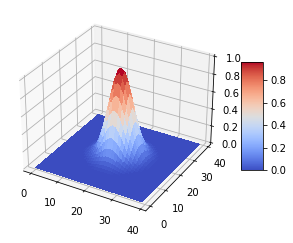

In [13]:
pre_geom = post_geom = (40, 40)
conn(pre_geom, post_geom)

pre_ids = conn.pre_ids
post_ids = conn.post_ids
weights = conn.weights
show_weight(pre_ids, post_ids, weights, pre_geom, 820)

### brainpy.connect.DOG


Builds a Difference-Of-Gaussian (dog) connection pattern between the two populations.

Mathematically,

$$
w(x, y) = w_{max}^+ \cdot \exp\left(-\frac{(x-x_c)^2+(y-y_c)^2}{2\sigma_+^2}\right)
    - w_{max}^- \cdot \exp\left(-\frac{(x-x_c)^2+(y-y_c)^2}{2\sigma_-^2}\right)
$$

where weights smaller than $0.01 * abs(w_{max} - w_{min})$ are not created and
self-connections are avoided by default (parameter allow_self_connections).


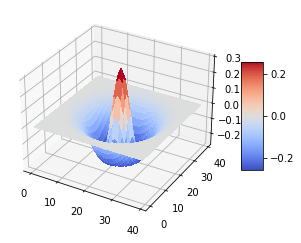

In [14]:
dog = bp.connect.DOG(sigmas=(0.08, 0.15), ws_max=(1.0, 0.7), w_min=0.01,
                     normalize=True, include_self=True)
h = 40
pre_geom = post_geom = (h, h)
dog(pre_geom, post_geom)

pre_ids = dog.pre_ids
post_ids = dog.post_ids
weights = dog.weights
show_weight(pre_ids, post_ids, weights, (h, h), h * h // 2 + h // 2)

### brainpy.connect.SmallWorld

`SmallWorld` is a connector class to help build a [small-world network](https://en.wikipedia.org/wiki/Small-world_network) [1].  small-world network is defined to be a network where the typical distance L between two randomly chosen nodes (the number of steps required) grows proportionally to the logarithm of the number of nodes N in the network, that is:

$$
L\propto \log N
$$

[1] Duncan J. Watts and Steven H. Strogatz, Collective dynamics of small-world networks, Nature, 393, pp. 440–442, 1998.

Currently, `SmallWorld` only support a one-dimensional network with the ring structure. It receives four settings:

- `num_neighbor`: the number of the nearest neighbors to connect.
- `prob`: the probability of rewiring each edge.
- `directed`: whether the edge is the directed ("directed=True") or undirected ("directed=False") connection.
- `include_self`: whether allow to connect to itself.

In [15]:
conn = bp.connect.SmallWorld(num_neighbor=5, prob=0.2, directed=False, include_self=False)

### brainpy.connect.ScaleFreeBA

`ScaleFreeBA` is a connector class to help build a random scale-free network according to the [Barabási–Albert preferential attachment model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model) [2]. `ScaleFreeBA` receives the following settings:

- `m`: Number of edges to attach from a new node to existing nodes.
- `directed`: whether the edge is the directed ("directed=True") or undirected ("directed=False") connection.
- `seed`: Indicator of random number generation state.

[2] A. L. Barabási and R. Albert “Emergence of scaling in random networks”, Science 286, pp 509-512, 1999.

In [16]:
conn = bp.connect.ScaleFreeBA(m=5, directed=False, seed=12345)

### brainpy.connect.ScaleFreeBADual

`ScaleFreeBADual` is a connector class to help build a random scale-free network according to the dual Barabási–Albert preferential attachment model [3]. ScaleFreeBA receives the following settings:

- `p`: The probability of attaching $m_1$ edges (as opposed to $m_2$ edges).
- `m1` : Number of edges to attach from a new node to existing nodes with probability $p$.
- `m2`: Number of edges to attach from a new node to existing nodes with probability $1-p$.   
- `directed`: whether the edge is the directed ("directed=True") or undirected ("directed=False") connection.
- `seed`: Indicator of random number generation state.

[3] N. Moshiri. "The dual-Barabasi-Albert model", arXiv:1810.10538.

In [17]:
conn = bp.connect.ScaleFreeBADual(m1=3, m2=5, p=0.5, directed=False, seed=12345)

### brainpy.connect.PowerLaw

`PowerLaw` is a connector class to help build a random graph with powerlaw degree distribution and approximate average clustering [4]. It receives the following settings:

- `m` : the number of random edges to add for each new node
- `p` : Probability of adding a triangle after adding a random edge
- `directed`: whether the edge is the directed ("directed=True") or undirected ("directed=False") connection.
- `seed` : Indicator of random number generation state.

[4] P. Holme and B. J. Kim, “Growing scale-free networks with tunable clustering”, Phys. Rev. E, 65, 026107, 2002.

In [18]:
conn = bp.connect.PowerLaw(m=3, p=0.5, directed=False, seed=12345)

## Customize your connections

BrainPy also allows you to customize your model connections. What need users do is only two aspects:

- Your connection class should inherit `brainpy.connect.Connector`. 
- Initialize the `conn_mat`  or `pre_ids`+ `post_ids` synaptic structures.
- Provide `num_pre` and `num_post` information.

In such a way, based on this customized connection class, users can generate any other synaptic structures (such like `pre2post`, `pre2syn`, `pre_slice_syn`, etc.) easily.

Here, let's take a simple connection as an example. In this example, we create a connection method which receives users' handful index projection. 

In [19]:
class IndexConn(bp.connect.Connector):
    def __init__(self, i, j):
        super(IndexConn, self).__init__()
        
        # initialize the class via "pre_ids" and "post_ids"
        self.pre_ids = bp.ops.as_tensor(i)
        self.post_ids = bp.ops.as_tensor(j)
    
    def __call__(self, pre_size, post_size):
        self.num_pre = bp.size2len(pre_size)  # this is ncessary when create "pre2post" , 
                                              # "pre2syn"  etc. structures
        self.num_post = bp.size2len(post_size) # this is ncessary when create "post2pre" , 
                                               # "post2syn"  etc. structures
        return self

Let's try to use it.

In [20]:
conn = IndexConn(i=[0, 1, 2], j=[0, 0, 0])
conn = conn(pre_size=5, post_size=3)

In [21]:
conn.requires('conn_mat')

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
conn.requires('pre2post')

[array([0]),
 array([0]),
 array([0]),
 array([], dtype=int32),
 array([], dtype=int32)]

In [23]:
conn.requires('pre2syn')

[array([0]),
 array([1]),
 array([2]),
 array([], dtype=int32),
 array([], dtype=int32)]

In [24]:
conn.requires('pre_slice_syn')

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 3],
       [3, 3]])

---

- Chaoming Wang (adaduo@outlook.com)
- Update at 2021.04.16

---